## Basic introduction to multivariate mixed functional data, distance measures and outlier detection. We could even add a plot funciton. And scaling and centering.

- construir una situación en la que nos interese estudiar los **outliers**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skfda import datasets
from skfda.exploratory.depth import IntegratedDepth, ModifiedBandDepth
from skfda.exploratory.visualization import Boxplot
from skfda.representation.grid import FDataGrid
from skfda.representation import FData

import pandas as pd

import skfda

from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother, BasisSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch

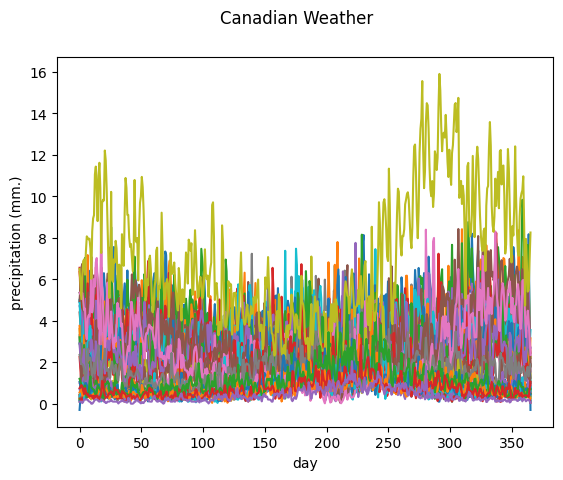

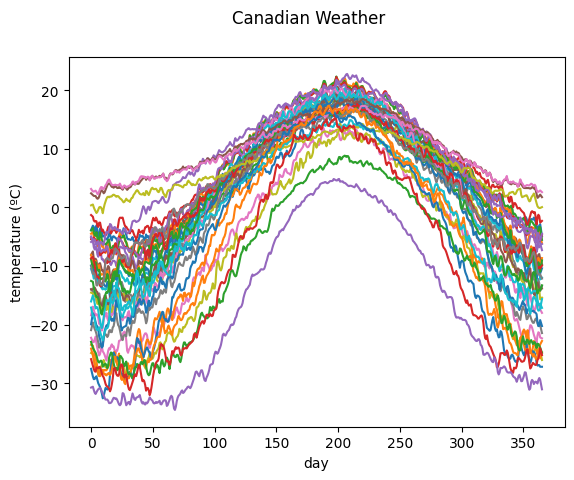

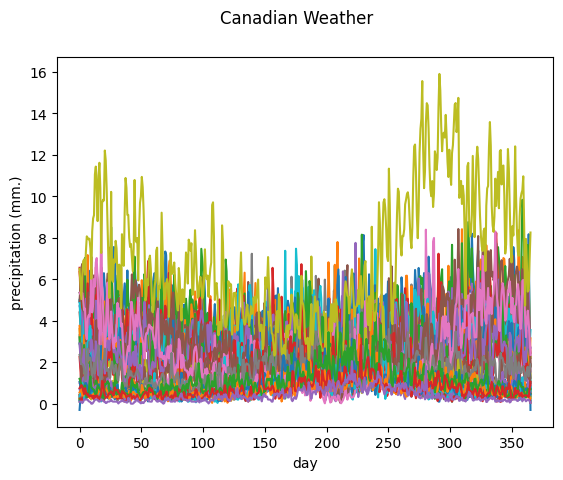

In [2]:
X, y = datasets.fetch_weather(return_X_y=True, as_frame=True)
fd = X.iloc[:, 0].values
fd_temperatures = fd.coordinates[0]
fd_precipitations = fd.coordinates[1]
fd_temperatures.plot()
fd_precipitations.plot()

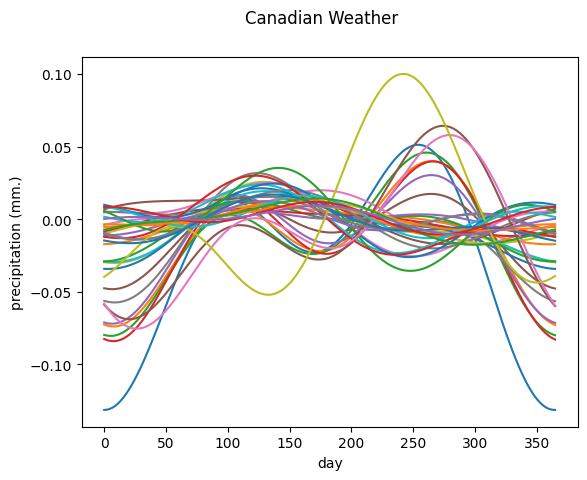

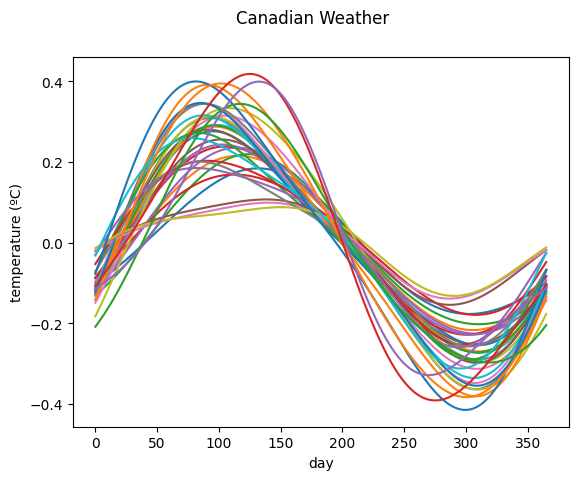

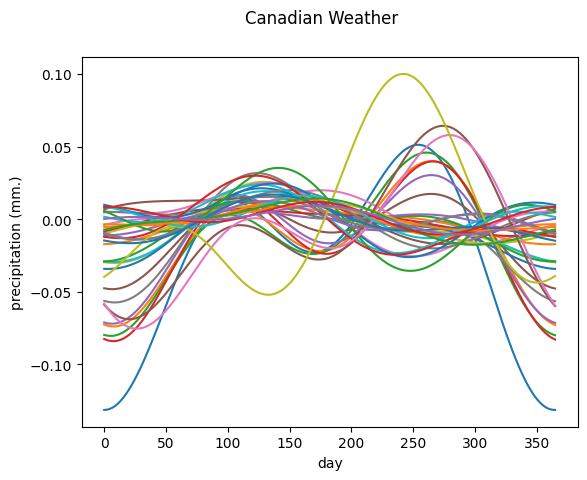

In [3]:
fd_D_temperatures = fd_temperatures.derivative(order=1)
fd_D_precipitations = fd_precipitations.derivative(order=1)

range_temperatures = fd_temperatures.grid_points[0][0], fd_temperatures.grid_points[0][-1]
range_precipitations = fd_precipitations.grid_points[0][0], fd_precipitations.grid_points[0][-1]

basis_temperatures = skfda.representation.basis.FourierBasis(range_temperatures, n_basis=5)
basis_precipitations = skfda.representation.basis.FourierBasis(range_precipitations, n_basis=5)

smoother_temperatures = BasisSmoother(basis=basis_temperatures)
smoother_precipitations = BasisSmoother(basis=basis_precipitations)


fd_D_temperatures_smooth = smoother_temperatures.fit_transform(fd_D_temperatures)
fd_D_precipitations_smooth = smoother_precipitations.fit_transform(fd_D_precipitations)

fd_D_temperatures_smooth.plot()
fd_D_precipitations_smooth.plot()


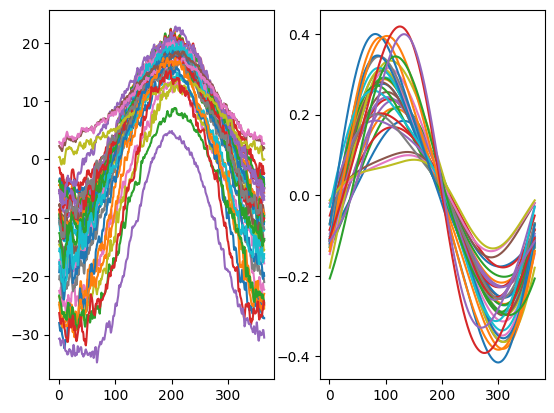

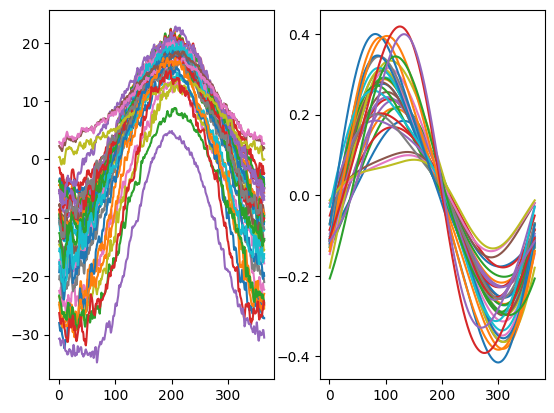

In [4]:
# Create a FDataGrid vector valued with a function and a derivative

data_matrix = np.concatenate([
    fd_temperatures.data_matrix, 
    fd_D_temperatures_smooth.data_matrix
], axis=2) 

fd_vector = FDataGrid(
    data_matrix=data_matrix, 
    grid_points=fd_temperatures.grid_points,
)

# Plot the vector-valued function
fd_vector.plot()

In [ ]:
mixed_df = pd.DataFrame(
    {
        "category": y,
        "temperatures": fd_temperatures,
        "temperature_derivatives": fd_D_temperatures_smooth,
        "precipitations_vector": fd_vector,
    }
)

In [ ]:
from skfda.misc.metrics import PProductMetric

metric = PProductMetric(
    metric=(uniform(), uniform()),
    weights=(1, 1),
)

mean = [collumn.mean() for collumn in mixed_df.collumns]
meand_df = pd.DataFrame(mean, columns= mixed_df.columns)

# Compute distance of each observation to the mean
distances = []
for i in range(len(mixed_df)):
    distances.append(metric(mixed_df.iloc[i], mean))
distances = np.array(distances)
# Find the outliers
outliers = np.where(distances > 2 * np.std(distances))[0]
# Plot the outliers

----

In [2]:

from __future__ import annotations

from typing import Any, Mapping, Tuple

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster
from cartopy.io.img_tiles import GoogleTiles
from matplotlib.axes import Axes
from matplotlib.figure import Figure

from skfda.datasets import fetch_aemet
from skfda.exploratory.depth import ModifiedBandDepth
from skfda.exploratory.visualization import Boxplot, MagnitudeShapePlot
from skfda.exploratory.visualization.fpca import FPCAPlot
from skfda.misc.metrics import l2_distance
from skfda.ml.clustering import KMeans
from skfda.preprocessing.dim_reduction import FPCA

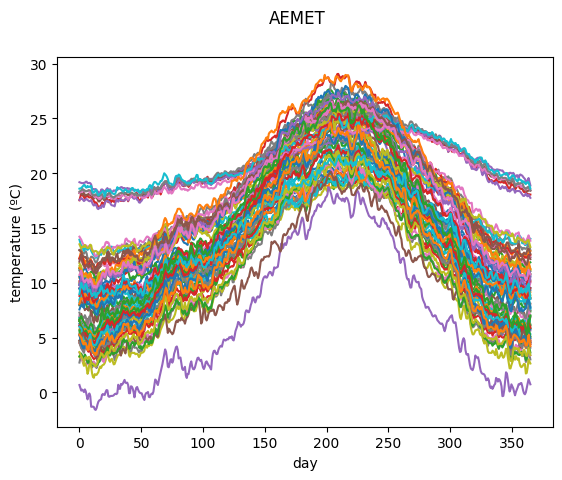

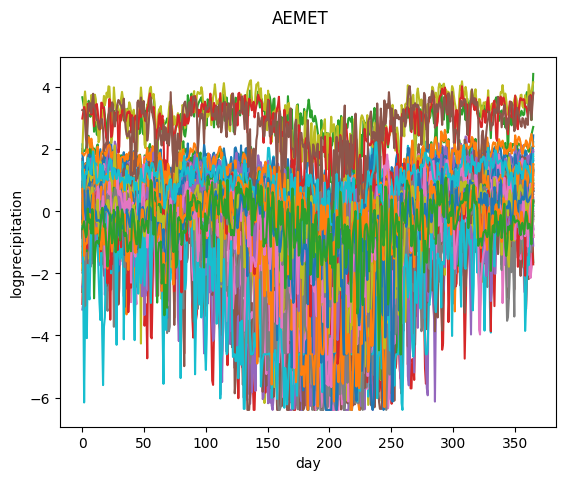

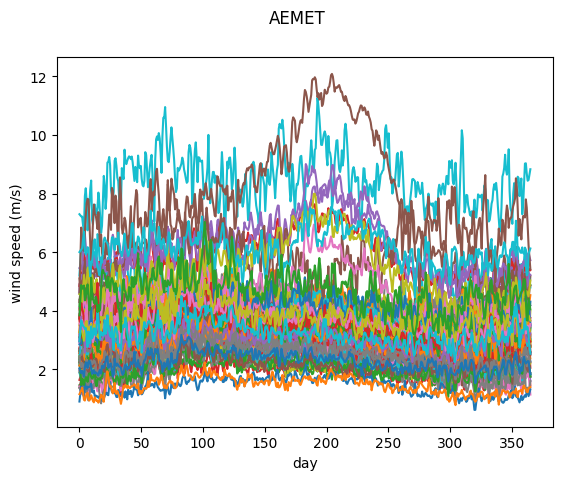

In [6]:
X, _ = fetch_aemet(return_X_y=True)

A = X.coordinates[0]
B = X.coordinates[1]
C = X.coordinates[2]

A.plot()
B.plot()
C.plot()

print()
